In [8]:
!pip install requests
!pip install fear-and-greed
!pip install tqdm
!pip install pandas
!pip install matplotlib
!pip install secure-smtplib
!pip install email

     ---------------------------------------- 7.6/7.6 MB 27.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 54.4 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 32.3 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 kB ? eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00


In [12]:
import datetime
import requests
import json
from tqdm import tqdm
import pandas as pd
from random import choice
import matplotlib.pyplot as plt

Whole_data = pd.DataFrame()

USER_AGENTS = [
    # Chrome on Windows 10
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36",
    # Chrome on macOS
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36",
    # Chrome on Linux
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36",
    # Firefox on Windows
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0",
    # Firefox on Macos
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12.4; rv:100.0) Gecko/20100101 Firefox/100.0",
]
user_agent = choice(USER_AGENTS)
headers = {
            "User-Agent": user_agent,
        }


start_date = datetime.date(2021, 1, 1)
end_date = datetime.date(2023, 7, 17)

day_count = (end_date - start_date).days
date = start_date

for i in tqdm(range(0,day_count)):
    data = pd.DataFrame()
    date += datetime.timedelta(days=1)
    try: 
        request = requests.get('https://production.dataviz.cnn.io/index/fearandgreed/graphdata/' + str(date), headers=headers)
        r = request.json()['fear_and_greed_historical']['data'][0]
        data['Date'] = [date]
        data['index'] = [r['y']]
        data['pull_call_ratio'] = [request.json()['put_call_options']['data'][0]['y']]

        Whole_data = pd.concat([Whole_data, data], ignore_index=True)

    except:
        print(date) 

100%|██████████| 927/927 [09:21<00:00,  1.65it/s]


In [14]:
Whole_data['Date'] = pd.to_datetime(Whole_data['Date'])
Whole_data.shape

(927, 3)

In [15]:
Whole_data

,Date,index,pull_call_ratio
0,2021-01-02,50.000000,0.587254
1,2021-01-03,50.000000,0.587254
2,2021-01-04,50.000000,0.587254
3,2021-01-05,50.000000,0.591191
4,2021-01-06,50.000000,0.580792
...,...,...,...
922,2023-07-13,81.114286,0.669071
923,2023-07-14,80.000000,0.664635
924,2023-07-15,80.942857,0.661520
925,2023-07-16,80.942857,0.661520


In [16]:
Whole_data.to_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\fearindex_pull_ratio_2021.csv')

## Merging the historical to the new data

In [34]:
Historical_data = pd.read_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\fear_greed_index_10Y.csv')

In [38]:
Historical_data.columns = ['date','index']

In [40]:
Whole_data.reset_index()

,date,index
0,2021-01-22,68.900000
1,2021-01-23,69.700000
2,2021-01-24,69.700000
3,2021-01-25,69.700000
4,2021-01-26,67.400000
...,...,...
864,2023-06-05,73.114286
865,2023-06-06,75.057143
866,2023-06-07,76.228571
867,2023-06-08,77.400000


In [43]:
Complete_data = pd.concat([Historical_data,Whole_data.reset_index()], ignore_index=True)

In [45]:
Complete_data['date'] = pd.to_datetime(Complete_data['date'])

In [48]:
Complete_data.to_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\complete_data_fearindex.csv')

<Axes: xlabel='date'>

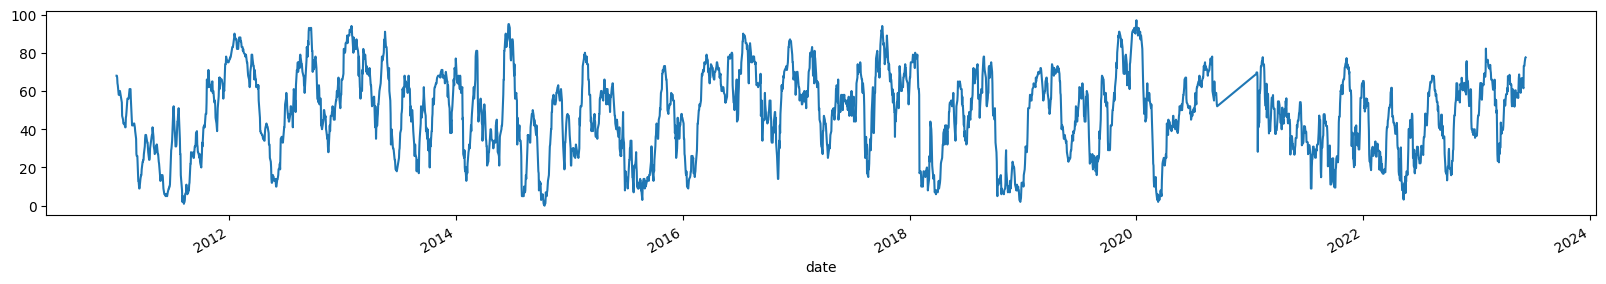

In [49]:
Complete_data.set_index('date', inplace=True)
Complete_data['index'].plot(figsize=(20, 3))